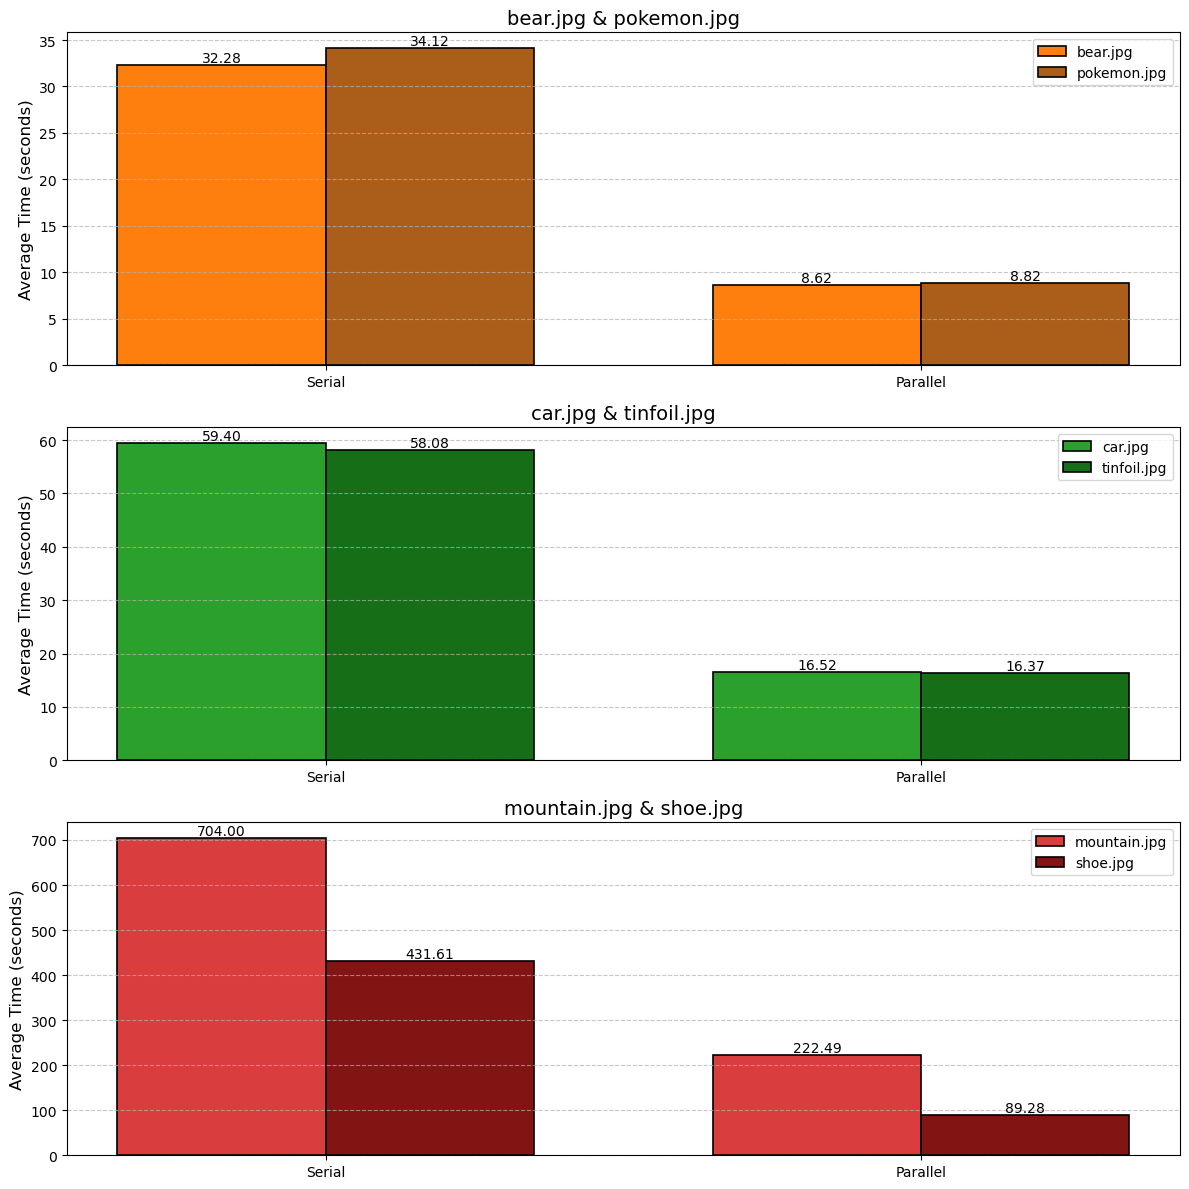

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('execution_times1.csv')

# Group by Image and Mode, then compute the average time
avg_times = df.groupby(['Image', 'Mode'])['Time'].mean().unstack()

# Define color map for categories
category_colors = {
    'bear.jpg': '#ff7f0e',  # Small (Serial color)
    'pokemon.jpg': '#ab5e1a',    # Small (Serial color)
    'car.jpg': '#2ca02c',   # Medium (Serial color)
    'tinfoil.jpg': '#166e16',# Medium (Serial color)
    'mountain.jpg': '#d93d3e', # Large (Serial color)
    'shoe.jpg': '#821414'   # Large (Serial color)
}

# Define a separate color for Parallel bars (darker or lighter shades of Serial color)
parallel_colors = {
    'bear.jpg': '#ff7f0e',  # Small (Serial color)
    'pokemon.jpg': '#ab5e1a',    # Small (Serial color)
    'car.jpg': '#2ca02c',   # Medium (Serial color)
    'tinfoil.jpg': '#166e16',# Medium (Serial color)
    'mountain.jpg': '#d93d3e', # Large (Serial color)
    'shoe.jpg': '#821414'   # Large (Serial color)
}

# Create image pairs for the subplots
image_pairs = [
    ('bear.jpg', 'pokemon.jpg'),  # First subplot: Bear and Pokemon
    ('car.jpg', 'tinfoil.jpg'),   # Second subplot: Car and Tinfoil
    ('mountain.jpg', 'shoe.jpg')  # Third subplot: Mountain and Shoe
]

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Iterate through each image pair to create the plot
for i, (image1, image2) in enumerate(image_pairs):
    # Filter the data for serial and parallel modes for both images
    serial1 = avg_times.loc[image1, 'Serial']
    parallel1 = avg_times.loc[image1, 'Parallel']
    serial2 = avg_times.loc[image2, 'Serial']
    parallel2 = avg_times.loc[image2, 'Parallel']
    
    # Get category color for each image
    serial_color1 = category_colors[image1]
    parallel_color1 = parallel_colors[image1]
    serial_color2 = category_colors[image2]
    parallel_color2 = parallel_colors[image2]
    
    # Set the bar width and positions to avoid overlap
    bar_width = 0.35
    group_centers = [0.5, 1.5]
    positions1 = [x - bar_width / 2 for x in group_centers]
    positions2 = [x + bar_width / 2 for x in group_centers]


    # Plot serial and parallel bars for both images side by side
    bars1 = axs[i].bar(positions1, [serial1, parallel1], color=[serial_color1, parallel_color1], width=bar_width, label=f'{image1}', edgecolor='black', linewidth=1.2)
    bars2 = axs[i].bar(positions2, [serial2, parallel2], color=[serial_color2, parallel_color2], width=bar_width, label=f'{image2}', edgecolor='black', linewidth=1.2)
    
    # Title and labels with adjusted font sizes
    axs[i].set_title(f'{image1} & {image2}', fontsize=14)
    axs[i].set_ylabel('Average Time (seconds)', fontsize=12)
        # Set x-axis labels for each group of bars
    group1_center = (positions1[0] + positions2[0]) / 2
    group2_center = (positions1[1] + positions2[1]) / 2
    axs[i].set_xticks([group1_center, group2_center])

    axs[i].set_xticklabels(['Serial', 'Parallel'])

    # Ensure all subplots show the x-axis labels
    axs[i].tick_params(labelbottom=True)

    
    # Adding value annotations on top of bars, adjusting position
    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
    
    # Add grid lines for readability
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Set x-axis labels for each group of bars
    axs[i].set_xticks([0.5, 1.5])  # Positions for 'Serial' and 'Parallel'
    axs[i].set_xticklabels(['Serial', 'Parallel'])  # Labels for Serial and Parallel

    # Adding legends to each subplot
    axs[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as an image to include in the report
#plt.savefig('execution_times_combined_colored_grouped_side_by_side_with_labels.png')

# Display the plot
plt.show()


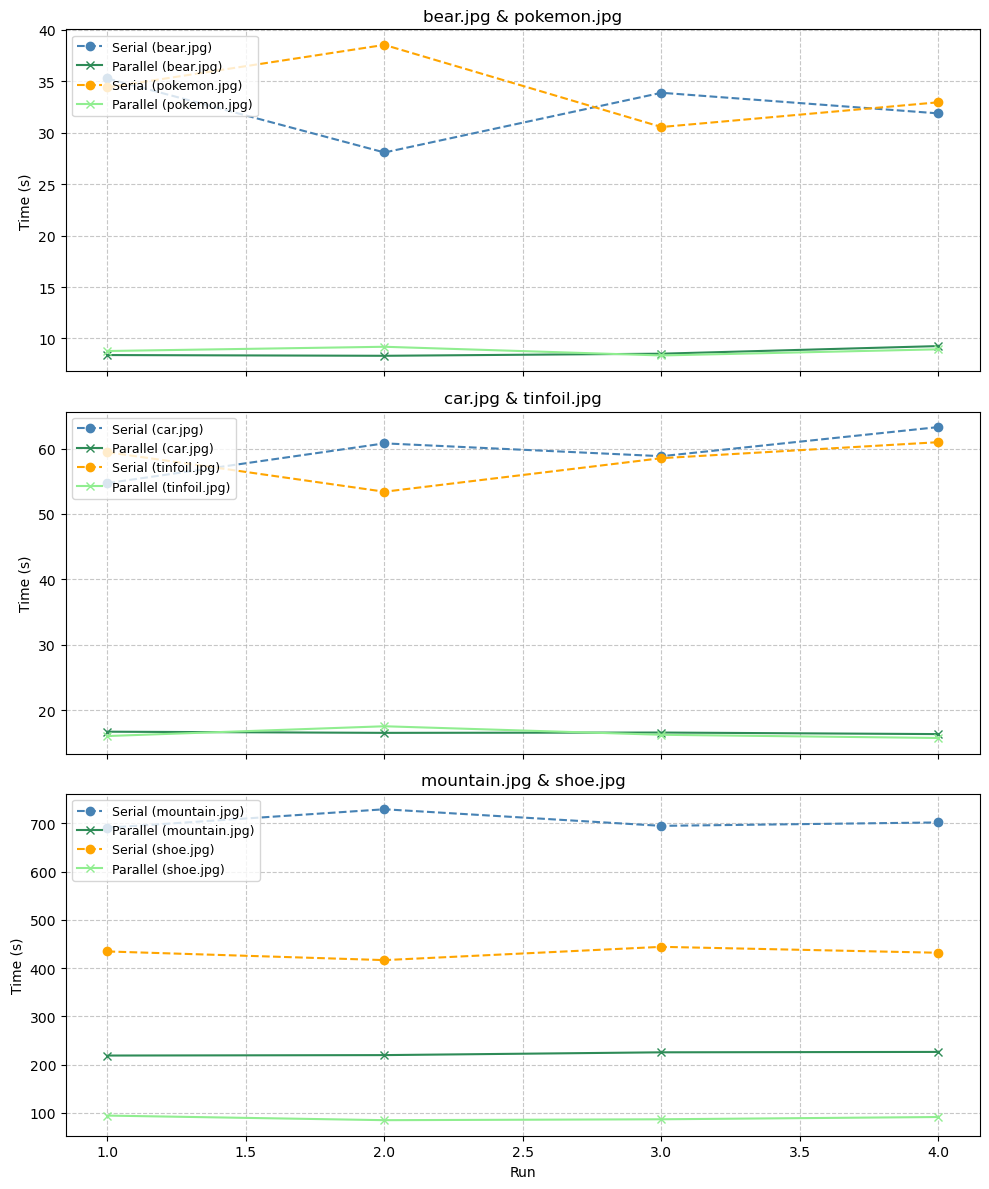

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('execution_times1.csv')

# Sort the DataFrame by 'Image', 'Mode', and 'Run'
df.sort_values(by=['Image', 'Mode', 'Run'], inplace=True)

# Define image pairs
image_pairs = [
    ('bear.jpg', 'pokemon.jpg'),  # First subplot: Bear and Pokemon
    ('car.jpg', 'tinfoil.jpg'),   # Second subplot: Car and Tinfoil
    ('mountain.jpg', 'shoe.jpg')  # Third subplot: Mountain and Shoe
]

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Iterate through each image pair to create the plot
for i, (image1, image2) in enumerate(image_pairs):
    # Filter the data for serial and parallel modes for both images
    serial1 = df[(df['Image'] == image1) & (df['Mode'] == 'Serial')].sort_values('Run')
    parallel1 = df[(df['Image'] == image1) & (df['Mode'] == 'Parallel')].sort_values('Run')
    serial2 = df[(df['Image'] == image2) & (df['Mode'] == 'Serial')].sort_values('Run')
    parallel2 = df[(df['Image'] == image2) & (df['Mode'] == 'Parallel')].sort_values('Run')
    
    # Plot serial and parallel lines for both images
    axs[i].plot(serial1['Run'], serial1['Time'], label=f'Serial ({image1})', marker='o', linestyle='--', color='steelblue')
    axs[i].plot(parallel1['Run'], parallel1['Time'], label=f'Parallel ({image1})', marker='x', linestyle='-', color='seagreen')
    axs[i].plot(serial2['Run'], serial2['Time'], label=f'Serial ({image2})', marker='o', linestyle='--', color='orange')
    axs[i].plot(parallel2['Run'], parallel2['Time'], label=f'Parallel ({image2})', marker='x', linestyle='-', color='lightgreen')

    # Set the title and labels
    axs[i].set_title(f'{image1} & {image2}', fontsize=12)
    axs[i].set_ylabel('Time (s)', fontsize=10)
    axs[i].legend(loc='upper left', fontsize=9)
    axs[i].grid(True, linestyle='--', alpha=0.7)

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Run', fontsize=10)

# Adjust layout to avoid overlap and improve readability
plt.tight_layout()

# Show the plots
plt.show()


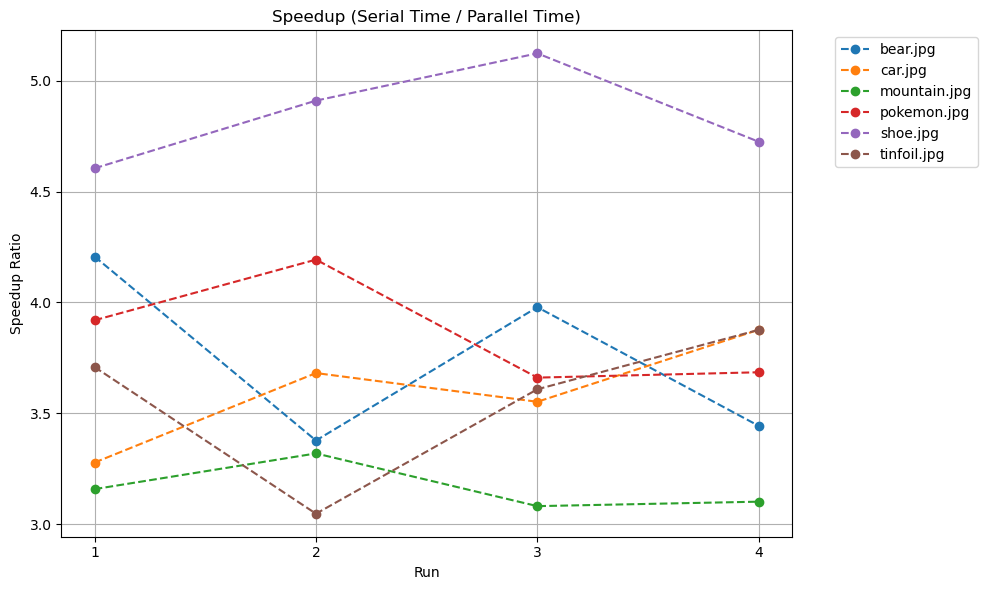

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and sort the CSV
df = pd.read_csv('execution_times1.csv')
df.sort_values(by=['Image', 'Mode', 'Run'], inplace=True)

# Set up the plot
plt.figure(figsize=(10, 6))

# Color palette
import itertools
colors = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])

# Plot speedup per image
for image in df['Image'].unique():
    serial = df[(df['Image'] == image) & (df['Mode'] == 'Serial')].sort_values('Run')
    parallel = df[(df['Image'] == image) & (df['Mode'] == 'Parallel')].sort_values('Run')
    
    speedup = serial['Time'].values / parallel['Time'].values
    runs = serial['Run'].values
    
    plt.plot(runs, speedup, label=f'{image}', marker='o', linestyle='--', color=next(colors))

plt.title('Speedup (Serial Time / Parallel Time)')
plt.xlabel('Run')
plt.ylabel('Speedup Ratio')
plt.xticks([1, 2, 3, 4])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
